In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'savefig.dpi': 1200})
import numpy as np

def running_mean(vals, gamma, ws=None):
    if ws is None:
        ws = max(int(np.log(0.01)/np.log(gamma)), 1)
    w = gamma*np.arange(ws)
    w /= w.sum()
    return np.convolve(w, vals)[len(w)-1:]

# Two Box Foraging Experiment

There are two boxes in the environment, each uses its own color cue to indicate food availability. An agent can move to different locations and push button if it is at a box.

In [2]:
from boxforage.environment import Box, Agent, ForagingEnvironment

boxes = [
    Box('A', 0.2, 0.05, max_color=10, p_low=0.3, p_high=0.7),
    Box('B', 0.3, 0.1, max_color=8, p_low=0.4, p_high=0.6),
]
agent = Agent()

experiment = ForagingEnvironment(boxes, agent)

## Example of a random agent

In [3]:
T = 5000
for t in range(1, T+1):
    experiment.step()

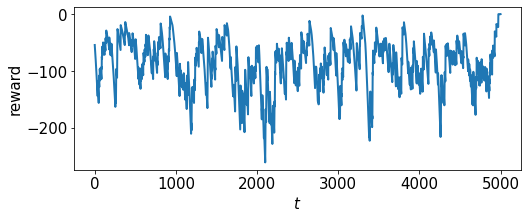

In [4]:
_, ax = plt.subplots(figsize=(8, 3))
ax.plot(running_mean(agent.rewards, 0.95))
ax.set_xlabel(r'$t$')
ax.set_ylabel('reward')
plt.show()